In [1]:
pip install tensorflow-addons

Defaulting to user installation because normal site-packages is not writeable
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nni 3.0 requires typeguard<4.1.3,>=3.0.0, but you have typeguard 2.13.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


<class 'numpy.lib.npyio.NpzFile'>
['x', 'y', 'fs', 'ch_label', 'header_raw', 'header_annotation']
     Channel_0_Timestep_0  Channel_0_Timestep_1  Channel_0_Timestep_2  \
0              -29.142857            -16.666666            -23.619047   
1              -59.809525            -53.142857            -58.666668   
2              -26.952381            -20.190475            -11.714286   
3               42.095238             44.285713             43.809525   
4              -55.714287            -49.142857            -62.571430   
..                    ...                   ...                   ...   
838            -40.571430            -11.333333            -23.142857   
839             38.857143             55.809525             72.952377   
840             -2.666667            -42.666668            -42.952381   
841             30.380953             12.380953             19.142857   
842            -26.857143            -27.428572            -39.047619   

     Channel_0_Timestep_3

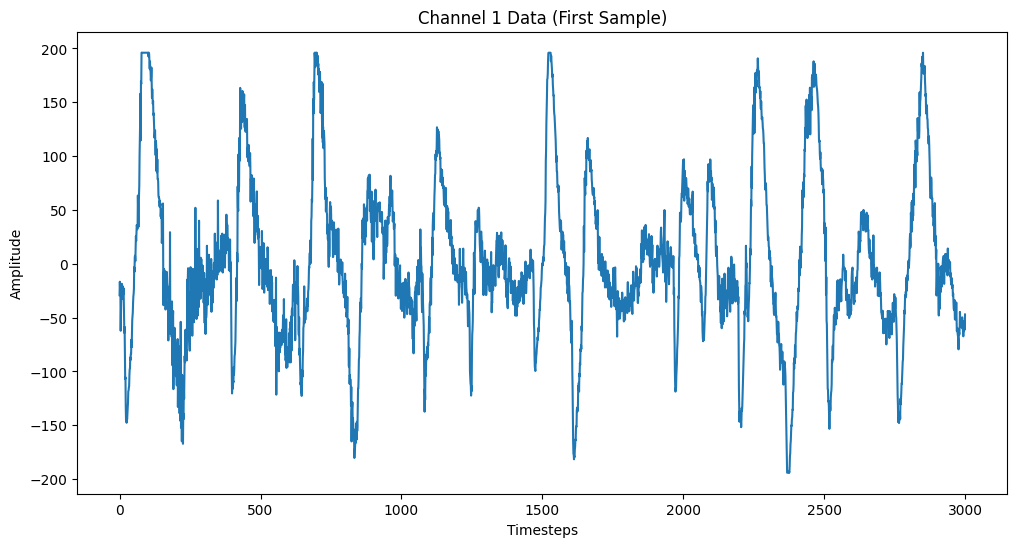

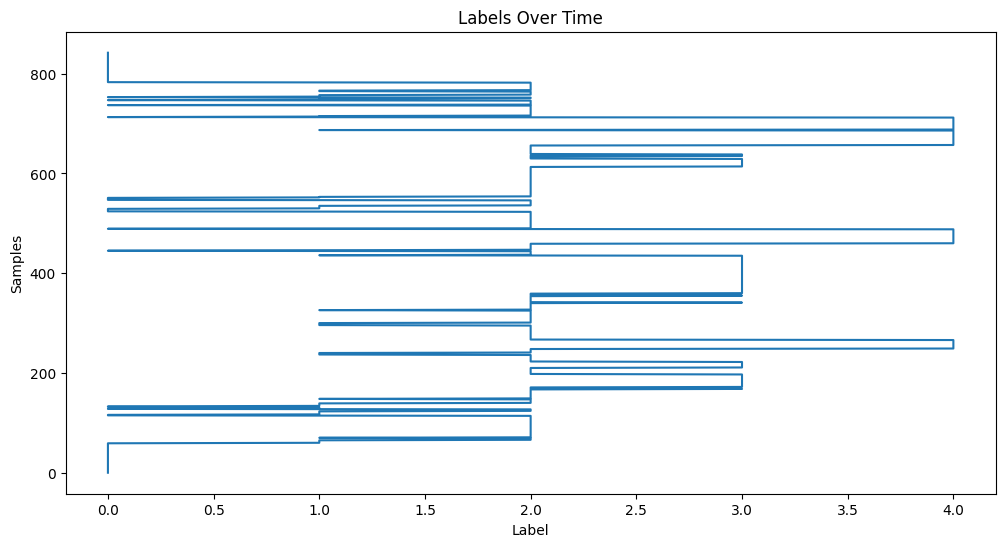

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/new_fpz/SC4061E0.npz"

data = np.load(path)

# Data inspection
print(type(data))
print(data.files)

# Extracting data
x = data['x']
y = data['y']

# Convert x data to DataFrame
num_samples, num_timesteps, num_channels = x.shape
x_flat = x.reshape(num_samples, num_timesteps * num_channels)
columns = [f"Channel_{i}_Timestep_{j}" for i in range(num_channels) for j in range(num_timesteps)]
df_x = pd.DataFrame(x_flat, columns=columns)

# Convert y data to DataFrame
df_y = pd.DataFrame(y, columns=['Label'])

# Combine x and y data into a single DataFrame
df = pd.concat([df_x, df_y], axis=1)

# DataFrame output
print(df)

# Plot first channel's first sample data
fig_1 = plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_timesteps), x[0, :, 0])
plt.title('Channel 1 Data (First Sample)')
plt.xlabel('Timesteps')
plt.ylabel('Amplitude')
plt.show()

# Plot label data with swapped axes
fig_2 = plt.figure(figsize=(12, 6))
plt.plot(df['Label'], np.arange(len(df['Label'])))
plt.title('Labels Over Time')
plt.ylabel('Samples')
plt.xlabel('Label')
plt.show()

<class 'numpy.lib.npyio.NpzFile'>
['x', 'y', 'fs', 'ch_label', 'header_raw', 'header_annotation']
     Channel_0_Timestep_0  Channel_0_Timestep_1  Channel_0_Timestep_2  \
0              -29.142857            -16.666666            -23.619047   
1              -59.809525            -53.142857            -58.666668   
2              -26.952381            -20.190475            -11.714286   
3               42.095238             44.285713             43.809525   
4              -55.714287            -49.142857            -62.571430   
..                    ...                   ...                   ...   
838            -40.571430            -11.333333            -23.142857   
839             38.857143             55.809525             72.952377   
840             -2.666667            -42.666668            -42.952381   
841             30.380953             12.380953             19.142857   
842            -26.857143            -27.428572            -39.047619   

     Channel_0_Timestep_3

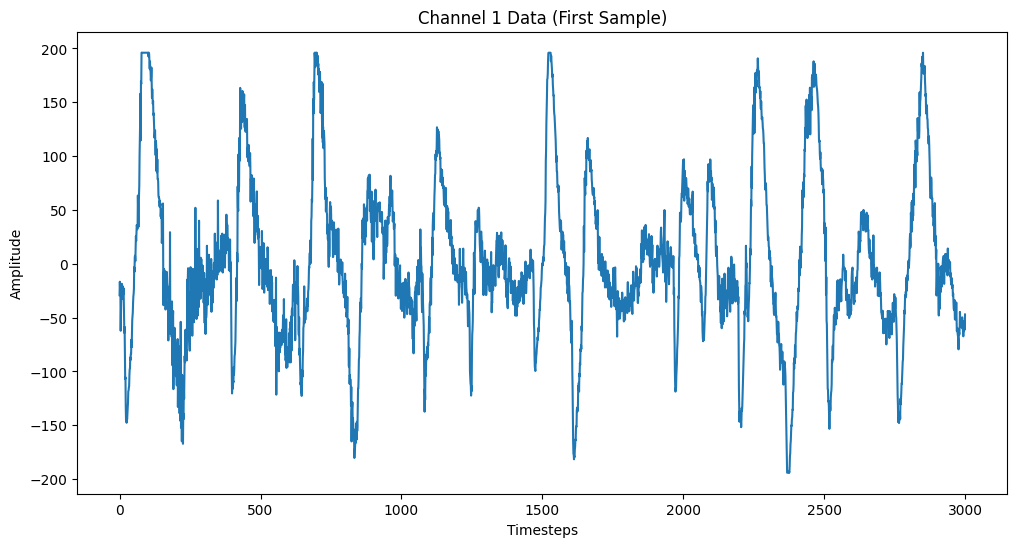

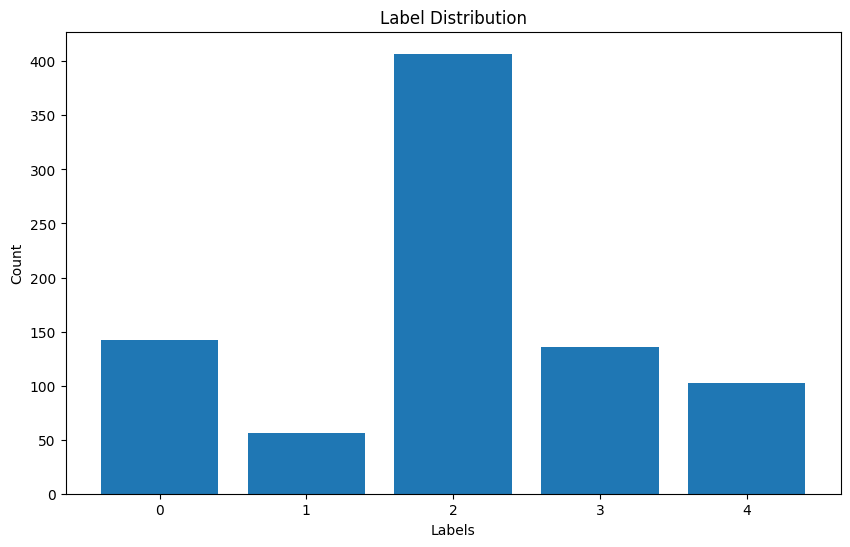

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/new_fpz/SC4061E0.npz"

data = np.load(path)

# Data inspection
print(type(data))
print(data.files)

# Extracting data
x = data['x']
y = data['y']

# Convert x data to DataFrame
num_samples, num_timesteps, num_channels = x.shape
x_flat = x.reshape(num_samples, num_timesteps * num_channels)
columns = [f"Channel_{i}_Timestep_{j}" for i in range(num_channels) for j in range(num_timesteps)]
df_x = pd.DataFrame(x_flat, columns=columns)

# Convert y data to DataFrame
df_y = pd.DataFrame(y, columns=['Label'])

# Combine x and y data into a single DataFrame
df = pd.concat([df_x, df_y], axis=1)

# DataFrame output
print(df)

# Plot first channel's first sample data
fig_1 = plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_timesteps), x[0, :, 0])
plt.title('Channel 1 Data (First Sample)')
plt.xlabel('Timesteps')
plt.ylabel('Amplitude')
plt.show()
# 라벨별 개수 계산
unique_labels, counts = np.unique(y, return_counts=True)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts, tick_label=unique_labels)
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

<class 'numpy.lib.npyio.NpzFile'>
['x', 'y', 'fs', 'ch_label', 'header_raw', 'header_annotation']


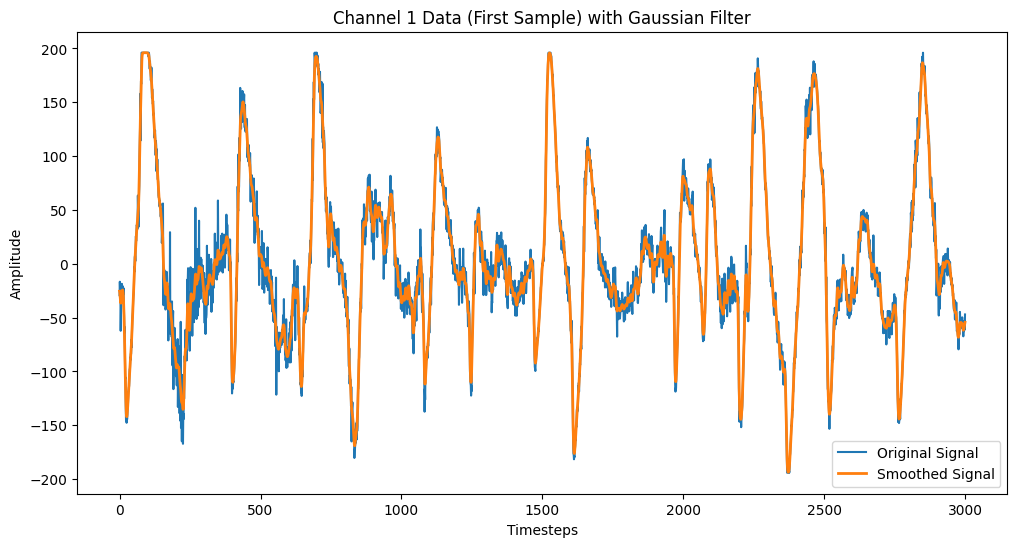

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

path = "/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/new_fpz/SC4061E0.npz"

data = np.load(path)

# 데이터 확인
print(type(data))
print(data.files)

# 데이터 추출
x = data['x']
y = data['y']

# 첫 번째 샘플, 첫 번째 채널 데이터 추출
first_sample_first_channel = x[0, :, 0]

# 가우시안 필터 적용
sigma = 2  # 가우시안 필터의 표준 편차
smoothed_signal = gaussian_filter1d(first_sample_first_channel, sigma=sigma)

# 원본 신호와 가우시안 필터가 적용된 신호를 비교하는 그래프
plt.figure(figsize=(12, 6))
plt.plot(first_sample_first_channel, label='Original Signal')
plt.plot(smoothed_signal, label='Smoothed Signal', linewidth=2)
plt.title('Channel 1 Data (First Sample) with Gaussian Filter')
plt.xlabel('Timesteps')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

<class 'numpy.lib.npyio.NpzFile'>
['x', 'y', 'fs', 'ch_label', 'header_raw', 'header_annotation']


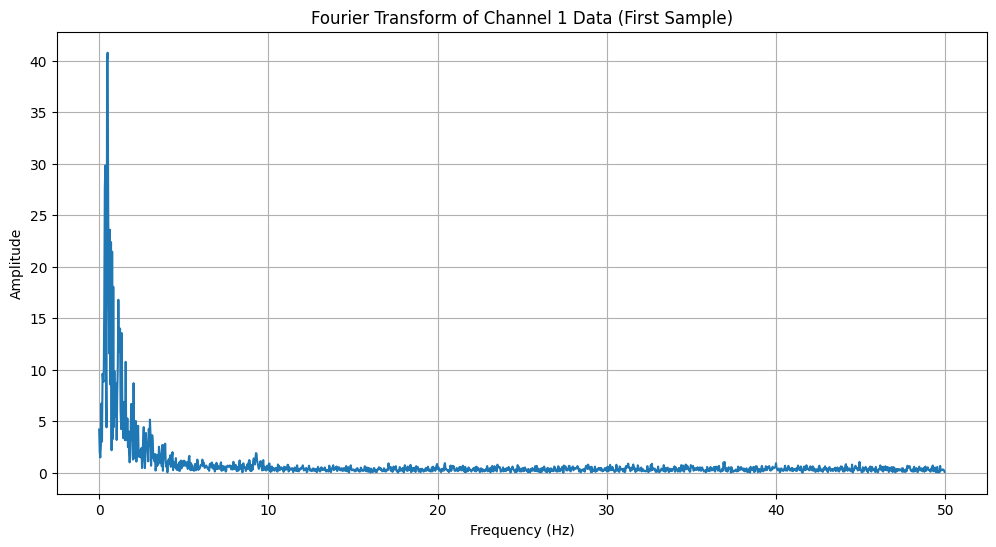

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# 데이터 로드
path = "/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/new_fpz/SC4061E0.npz"
data = np.load(path)

# 데이터 확인
print(type(data))
print(data.files)

# 데이터 추출
x = data['x']
y = data['y']

# 첫 번째 샘플, 첫 번째 채널 데이터 추출
first_sample_first_channel = x[0, :, 0]

# 퓨리에 변환 적용
N = len(first_sample_first_channel)
T = 1.0 / 100.0  # 샘플 간격 (여기서는 100Hz로 가정)
yf = fft(first_sample_first_channel)
xf = np.fft.fftfreq(N, T)[:N//2]

# 퓨리에 변환 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title('Fourier Transform of Channel 1 Data (First Sample)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

       Channel_0_Timestep_0  Channel_1_Timestep_0  Channel_2_Timestep_0  \
0                  8.111356             17.488646             21.239561   
1                -10.736997            -11.393407             -4.454213   
2                 61.374359             38.681320             49.558975   
3                 27.803663             24.146521             24.146521   
4                 69.157509             74.596336             79.003662   
...                     ...                   ...                   ...   
42303             23.446154             30.851282             17.112820   
42304             -2.276923             -4.225641             -5.492308   
42305            -16.794872            -24.394873            -28.000000   
42306            -12.215384            -23.907692             -6.076923   
42307             -8.805128             -5.687180             -0.912821   

       Channel_3_Timestep_0  Channel_4_Timestep_0  Channel_5_Timestep_0  \
0                  6.892

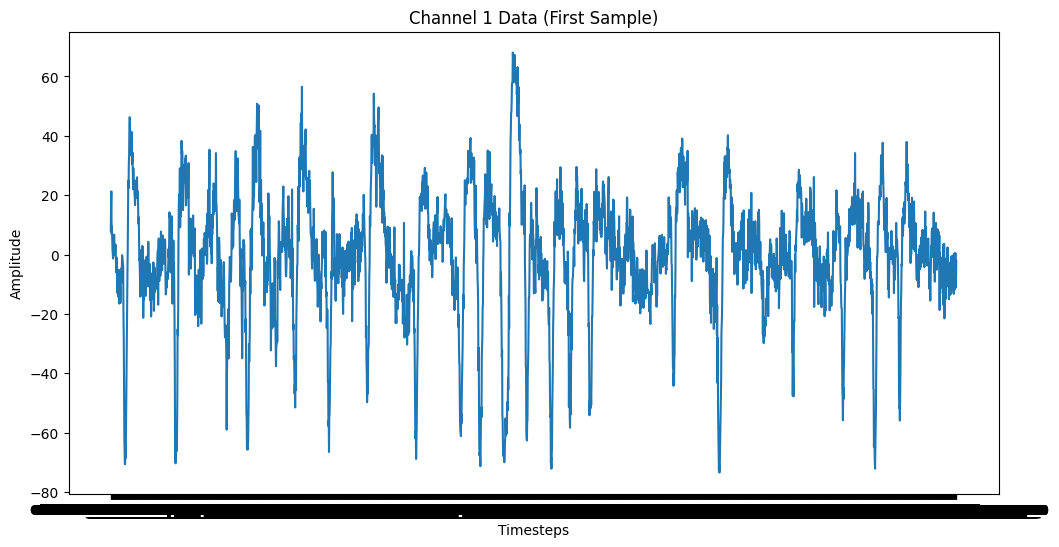

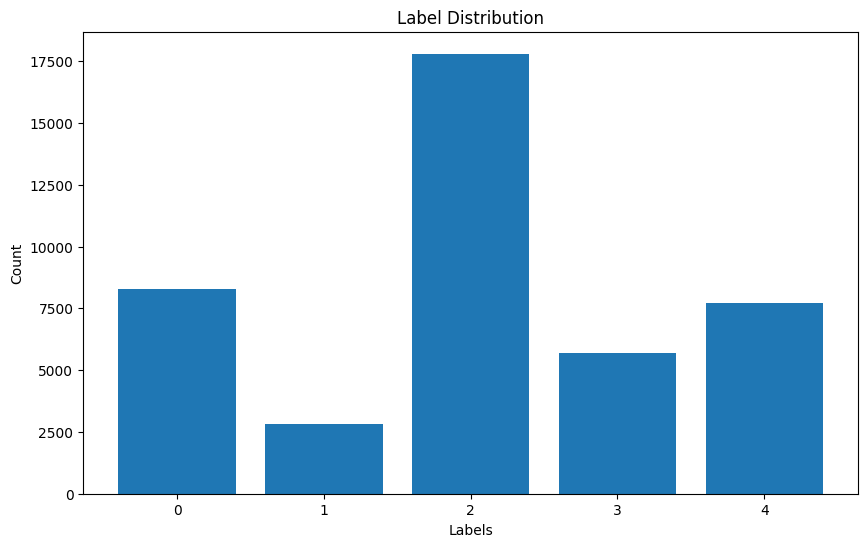

In [18]:
import numpy as np
import pandas as pd
import os

# 1. 파일 리스트 생성
npz_files = [
    "SC4001E0.npz",
    "SC4002E0.npz",
    "SC4011E0.npz",
    "SC4012E0.npz",
    "SC4021E0.npz",
    "SC4022E0.npz",
    "SC4031E0.npz",
    "SC4032E0.npz",
    "SC4041E0.npz",
    "SC4042E0.npz",
    "SC4051E0.npz",
    "SC4052E0.npz",
    "SC4061E0.npz",
    "SC4062E0.npz",
    "SC4071E0.npz",
    "SC4072E0.npz",
    "SC4081E0.npz",
    "SC4082E0.npz",
    "SC4091E0.npz",
    "SC4092E0.npz",
    "SC4101E0.npz",
    "SC4102E0.npz",
    "SC4111E0.npz",
    "SC4112E0.npz",
    "SC4121E0.npz",
    "SC4122E0.npz",
    "SC4131E0.npz",
    "SC4141E0.npz",
    "SC4142E0.npz",
    "SC4151E0.npz",
    "SC4152E0.npz",
    "SC4161E0.npz",
    "SC4162E0.npz",
    "SC4171E0.npz",
    "SC4172E0.npz",
    "SC4181E0.npz",
    "SC4182E0.npz",
    "SC4191E0.npz",
    "SC4192E0.npz"
]

# 2. 데이터 로드 및 데이터프레임 생성 함수
def load_npz_files(npz_files):
    df_list = []

    for file in npz_files:
        path = os.path.join("/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/new_fpz", file)
        data = np.load(path)
        
        # 'x' 데이터와 'y' 데이터 추출
        x = data['x']
        y = data['y']
        
        # x 데이터를 DataFrame으로 변환 (각 채널을 개별 열로 처리)
        num_samples, num_channels, num_timesteps = x.shape
        x_flat = x.reshape(num_samples, num_channels * num_timesteps)
        columns = [f"Channel_{i}_Timestep_{j}" for i in range(num_channels) for j in range(num_timesteps)]
        df_x = pd.DataFrame(x_flat, columns=columns)
        
        # y 데이터를 DataFrame으로 변환
        df_y = pd.DataFrame(y, columns=['Label'])
        
        # 파일 이름 추가
        df_y['File'] = file
        
        # x와 y 데이터를 하나의 DataFrame으로 결합
        df = pd.concat([df_x, df_y], axis=1)
        df_list.append(df)

    return pd.concat(df_list, ignore_index=True)

# 3. 데이터 로드 및 데이터프레임 생성
df_combined = load_npz_files(npz_files)
df_combined = df_combined.drop('File' , axis=1)
# 4. 데이터프레임 출력
print(df_combined)

# 첫 번째 채널의 첫 번째 샘플 데이터 시각화
fig_1 = plt.figure(figsize=(12, 6))
plt.plot(df_combined.iloc[0, :num_timesteps])
plt.title('Channel 1 Data (First Sample)')
plt.xlabel('Timesteps')
plt.ylabel('Amplitude')
plt.show()

# 3. 데이터 로드 및 데이터프레임 생성
df_combined = load_npz_files(npz_files)

# 4. 레이블 분포 시각화
label_counts = df_combined['Label'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(label_counts.index, label_counts.values)
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
ax.set_title('Label Distribution')
plt.show()

       Channel_0_Timestep_0  Channel_1_Timestep_0  Channel_2_Timestep_0  \
0                  0.474128              0.468517              0.493993   
1                  0.421374              0.382526              0.419599   
2                  0.623203              0.531614              0.575990   
3                  0.529244              0.488339              0.502410   
4                  0.644987              0.638544              0.661245   
...                     ...                   ...                   ...   
42303              0.517048              0.508302              0.482044   
42304              0.445053              0.403867              0.416593   
42305              0.404419              0.343817              0.351423   
42306              0.417236              0.345267              0.414900   
42307              0.426781              0.399515              0.429852   

       Channel_3_Timestep_0  Channel_4_Timestep_0  Channel_5_Timestep_0  \
0                  0.496

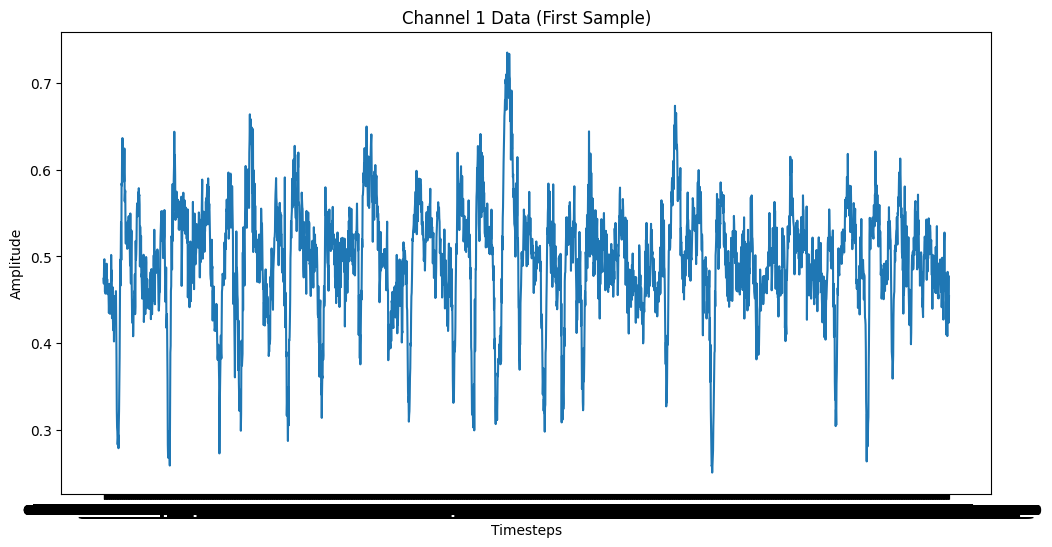

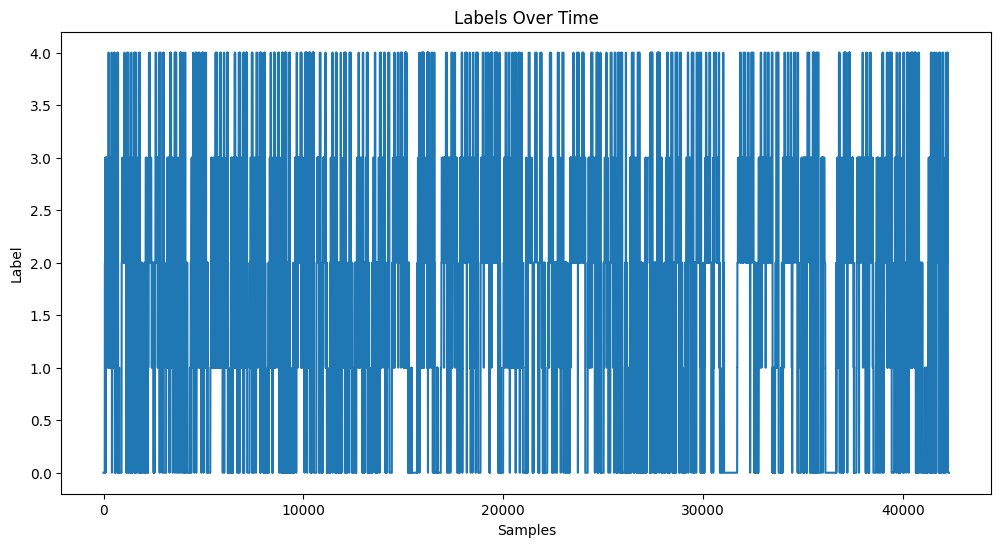

In [19]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# 1. 파일 리스트 생성
npz_files = [
    "SC4001E0.npz",
    "SC4002E0.npz",
    "SC4011E0.npz",
    "SC4012E0.npz",
    "SC4021E0.npz",
    "SC4022E0.npz",
    "SC4031E0.npz",
    "SC4032E0.npz",
    "SC4041E0.npz",
    "SC4042E0.npz",
    "SC4051E0.npz",
    "SC4052E0.npz",
    "SC4061E0.npz",
    "SC4062E0.npz",
    "SC4071E0.npz",
    "SC4072E0.npz",
    "SC4081E0.npz",
    "SC4082E0.npz",
    "SC4091E0.npz",
    "SC4092E0.npz",
    "SC4101E0.npz",
    "SC4102E0.npz",
    "SC4111E0.npz",
    "SC4112E0.npz",
    "SC4121E0.npz",
    "SC4122E0.npz",
    "SC4131E0.npz",
    "SC4141E0.npz",
    "SC4142E0.npz",
    "SC4151E0.npz",
    "SC4152E0.npz",
    "SC4161E0.npz",
    "SC4162E0.npz",
    "SC4171E0.npz",
    "SC4172E0.npz",
    "SC4181E0.npz",
    "SC4182E0.npz",
    "SC4191E0.npz",
    "SC4192E0.npz"
]

# 2. 데이터 로드 및 데이터프레임 생성 함수
def load_npz_files(npz_files):
    df_list = []

    for file in npz_files:
        path = os.path.join("/home/work/HCOH/sleep/physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/new_fpz", file)
        data = np.load(path)
        
        # 'x' 데이터와 'y' 데이터 추출
        x = data['x']
        y = data['y']
        
        # x 데이터를 DataFrame으로 변환 (각 채널을 개별 열로 처리)
        num_samples, num_channels, num_timesteps = x.shape
        x_flat = x.reshape(num_samples, num_channels * num_timesteps)
        columns = [f"Channel_{i}_Timestep_{j}" for i in range(num_channels) for j in range(num_timesteps)]
        df_x = pd.DataFrame(x_flat, columns=columns)
        
        # y 데이터를 DataFrame으로 변환
        df_y = pd.DataFrame(y, columns=['Label'])
        
        # 파일 이름 추가
        df_y['File'] = file
        
        # x와 y 데이터를 하나의 DataFrame으로 결합
        df = pd.concat([df_x, df_y], axis=1)
        df_list.append(df)

    return pd.concat(df_list, ignore_index=True)

# 3. 데이터 로드 및 데이터프레임 생성
df_combined = load_npz_files(npz_files)

# 4. 정규화 함수 정의 및 정규화 적용
def min_max_normalize(df):
    channel_columns = [col for col in df.columns if col.startswith('Channel')]
    df[channel_columns] = df[channel_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)
    return df

df_combined_normalized = min_max_normalize(df_combined)

# 5. 정규화된 데이터프레임 출력
print(df_combined_normalized)

# 첫 번째 채널의 첫 번째 샘플 데이터 시각화
fig_1 = plt.figure(figsize=(12, 6))
plt.plot(df_combined_normalized.iloc[0, :num_timesteps])
plt.title('Channel 1 Data (First Sample)')
plt.xlabel('Timesteps')
plt.ylabel('Amplitude')
plt.show()

# 레이블 데이터 시각화
fig_2 = plt.figure(figsize=(12, 6))
plt.plot(df_combined_normalized['Label'])
plt.title('Labels Over Time')
plt.xlabel('Samples')
plt.ylabel('Label')
plt.show()

In [20]:
y = df_combined_normalized['Label']
X = df_combined_normalized.drop('File' , axis=1)
X = X.drop('Label' , axis=1)

In [22]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 21)
     

In [23]:


def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [24]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

X_train, y_train = split_sequences(train_set, 50)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 50)
print(X_test.shape, y_test.shape)

(38028, 50, 3000) (38028,)
(4182, 50, 3000) (4182,)


In [25]:


y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values
     

In [26]:
X_train = X_train.astype('float32')
y_train_onehot = y_train_onehot.astype('float32')
X_test = X_test.astype('float32')
y_test_onehot = y_test_onehot.astype('float32')
     

In [31]:
import keras
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [28]:

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [32]:
input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(5, activation = "softmax")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50, 3000)]        0         
                                                                 
 conv1d_2 (Conv1D)           (None, 48, 64)            576064    
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                196672    
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 773061 (2.95 MB)
Trainable params: 773061 (2.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:

train_epochs = 15
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/15


2024-07-09 08:33:25.261726: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-07-09 08:33:25.563209: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f932d4d2f40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-09 08:33:25.563268: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-07-09 08:33:25.563275: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-07-09 08:33:25.568951: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-09 08:33:25.655827: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1070/1070 [==============================] - 11s 9ms/step - loss: 1.4850 - accuracy: 0.4184 - val_loss: 1.4829 - val_accuracy: 0.4110
Epoch 2/15
1070/1070 [==============================] - 7s 6ms/step - loss: 1.4478 - accuracy: 0.4224 - val_loss: 1.4541 - val_accuracy: 0.4110
Epoch 3/15
1070/1070 [==============================] - 7s 6ms/step - loss: 1.4475 - accuracy: 0.4224 - val_loss: 1.4545 - val_accuracy: 0.4110
Epoch 4/15
1070/1070 [==============================] - 7s 6ms/step - loss: 1.4465 - accuracy: 0.4224 - val_loss: 1.4574 - val_accuracy: 0.4110
Epoch 5/15
1070/1070 [==============================] - 7s 6ms/step - loss: 1.4454 - accuracy: 0.4224 - val_loss: 1.4596 - val_accuracy: 0.4110
Epoch 6/15
1070/1070 [==============================] - 7s 6ms/step - loss: 1.4453 - accuracy: 0.4224 - val_loss: 1.4542 - val_accuracy: 0.4110
Epoch 7/15
1070/1070 [==============================] - 7s 6ms/step - loss: 1.4453 - accuracy: 0.4224 - val_loss: 1.4545 - val_accuracy: 0.4110
Ep

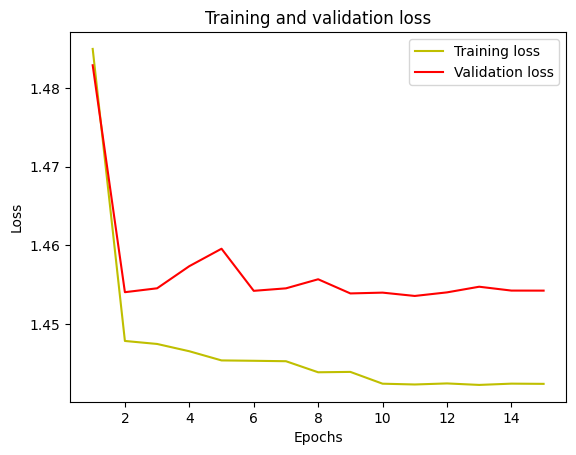

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
     

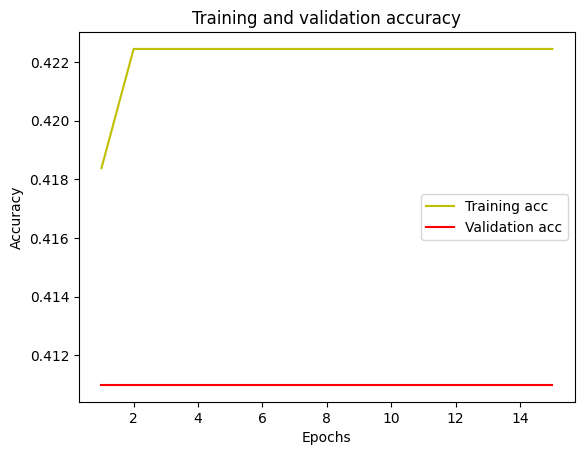

In [35]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:


#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)


#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

131/131 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       857
           1       0.00      0.00      0.00       281
           2       0.41      1.00      0.59      1732
           3       0.00      0.00      0.00       560
           4       0.00      0.00      0.00       752

    accuracy                           0.41      4182
   macro avg       0.08      0.20      0.12      4182
weighted avg       0.17      0.41      0.24      4182

[[   0    0  857    0    0]
 [   0    0  281    0    0]
 [   0    0 1732    0    0]
 [   0    0  560    0    0]
 [   0    0  752    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
